# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ridopandi Sinaga
- **Email:** ridosinaga037@gmail.com
- **ID Dicoding:** ridopandi

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola atau trend yang ditemukan pada penggunaan layanan bike sharing setiap bulan dan jam?
2. Adakah waktu jam tertentu dimana peminjama sepeda naik?
3. Apa musim yang memiliki peminjam sepeda terbanyak?
4. Apakah ada korelasi antara suhu dan kelembaban dengan jumlah peminjaman sepeda?
5. Apakah cuaca mempengaruhi peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from google.colab import files
import zipfile, os

## Data Wrangling

Dataset yang digunakan pada proyek analisis data ini adalah [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) yang berasal dari Kaggle. Terdapat dua file didalamnya yaitu `day.csv` dan `hour.csv` yang masing-masing berbentuk file CSV (*Comma-separated Values*).

Sebelum mengunduh dataset tersebut perlu dilakukan konfigurasi terkait Kaggle terlebih dahulu yakni sebagai berikut.

 Menginstal paket Kaggle untuk berinteraksi dengan Kaggle API.

In [ ]:
!pip install -q kaggle

Mengunggah file kaggle.json yang berisi kredensial API Kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ridopandisinaga","key":"0e097b65f093f6d54d4319743d6b7692"}'}

Mengatur izin file kaggle.json agar hanya dapat dibaca dan ditulis oleh pemilik.

In [ ]:
!chmod 600 /content/kaggle.json

Mengunduh dataset dengan menggunakan perintah Kaggle API `kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset` dan menyimpannya dalam direktori.

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 48.4MB/s]


In [ ]:
#unzip dataset
local_zip = '/content/bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

Melakukan cek direktori file dataset, setelah dilakukan unzip data.

In [ ]:
print(os.listdir('/content'))

['.config', 'bike-sharing-dataset.zip', 'day.csv', 'kaggle.json', 'Readme.txt', 'hour.csv', 'sample_data']


### Gathering Data

Mengubah dan melihat isi dataset day.csv kedalam bentuk dataframe

In [75]:
#Ubah file path pada coding berikut sesuai dengan path dimana anda menyimpan database dari bike sharing
daily_data = pd.read_csv("/content/day.csv")
hourly_data = pd.read_csv("/content/hour.csv")

In [76]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [77]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Assessing Data

Cek `daily_data` dataframe.

In [78]:
daily_data.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Cek `hourly_data` dataframe.

In [79]:
hourly_data.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


Data duplikat:

In [80]:
duplicate_hourly = hourly_data.duplicated().sum()
duplicate_daily = daily_data.duplicated().sum()

In [81]:
print("Data Duplikat pada Hourly Dataset:", duplicate_hourly)
print("Data Duplikat pada Daily Dataset:", duplicate_daily)

Data Duplikat pada Hourly Dataset: 0
Data Duplikat pada Daily Dataset: 0


Tipe data tiap kolom:

In [82]:
print("Tipe Data Tiap Kolom di Hourly Dataset:")
print(data_types_hourly)
print("Tipe Data Tiap Kolom di Daily Dataset:")
print(data_types_daily)

Tipe Data Tiap Kolom di Hourly Dataset:
date          datetime64[ns]
season               float64
year                 float64
month                float64
hour                   int64
holiday             category
weekday              float64
workingday          category
weather              float64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
Tipe Data Tiap Kolom di Daily Dataset:
date          datetime64[ns]
season               float64
year                 float64
month                float64
holiday             category
weekday              float64
workingday          category
weather              float64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: o

Missing value pada kolom:

In [83]:
missing_hourly = hourly_data.isnull().sum()
missing_daily = daily_data.isnull().sum()

In [84]:
print("\nMissing Values di Hourly Dataset:")
print(missing_hourly)


Missing Values di Hourly Dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [85]:
print("\nMissing Values di Daily Dataset:")
print(missing_daily)


Missing Values di Daily Dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Analisis statistik daily_data dataframe

In [86]:
daily_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Analisis statistik hourly_data dataframe.

In [87]:
hourly_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil analisis deskriptif terlihat terdapat outlier pada data yang perlu dicek ketika cleaning data apakah outlier tersebut akan mempengaruhi keseluruhan data atau tidak

Mencari tahu unique value pada data:

In [88]:
daily_data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [89]:
hourly_data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [90]:
day_per_hour = hourly_data.groupby(by="dteday").agg({'hr':'count'}).reset_index()
day_per_hour[day_per_hour['hr']<24].sort_values('hr')

,dteday,hr
667,2012-10-29,1
26,2011-01-27,8
668,2012-10-30,11
17,2011-01-18,12
25,2011-01-26,16
...,...,...
723,2012-12-24,23
69,2011-03-11,23
71,2011-03-13,23
34,2011-02-04,23


In [98]:
pd.concat([
    daily_data[daily_data['dteday'] == '2011-01-26'],
    daily_data[daily_data['dteday'] == '2012-01-09'],
    daily_data[daily_data['dteday'] == '2012-01-21']
])

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
373,374,2012-01-09,1,1,1,0,1,1,2,0.224167,0.247479,0.701667,0.098900,106,2270,2376
385,386,2012-01-21,1,1,1,0,6,0,2,0.173333,0.174875,0.831250,0.222642,67,1234,1301


In [99]:
temp_hour=hourly_data.groupby('dteday')['temp'].mean()
print(temp_hour)

dteday
2011-01-01    0.344167
2011-01-02    0.363478
2011-01-03    0.196364
2011-01-04    0.200000
2011-01-05    0.226957
                ...   
2012-12-27    0.254167
2012-12-28    0.253333
2012-12-29    0.253333
2012-12-30    0.255833
2012-12-31    0.215833
Name: temp, Length: 731, dtype: float64


In [100]:
hum_hour=hourly_data.groupby('dteday')['hum'].mean()
print(hum_hour)

dteday
2011-01-01    0.805833
2011-01-02    0.696087
2011-01-03    0.437273
2011-01-04    0.590435
2011-01-05    0.436957
                ...   
2012-12-27    0.652917
2012-12-28    0.590000
2012-12-29    0.752917
2012-12-30    0.483333
2012-12-31    0.577500
Name: hum, Length: 731, dtype: float64


In [101]:
atemp_hour=hourly_data.groupby('dteday')['atemp'].mean()
print(atemp_hour)

dteday
2011-01-01    0.363625
2011-01-02    0.353739
2011-01-03    0.189405
2011-01-04    0.212122
2011-01-05    0.229270
                ...   
2012-12-27    0.226642
2012-12-28    0.255046
2012-12-29    0.242400
2012-12-30    0.231700
2012-12-31    0.223487
Name: atemp, Length: 731, dtype: float64


In [102]:
wind_hour=hourly_data.groupby('dteday')['windspeed'].mean()
print(wind_hour)

dteday
2011-01-01    0.160446
2011-01-02    0.248539
2011-01-03    0.248309
2011-01-04    0.160296
2011-01-05    0.186900
                ...   
2012-12-27    0.350133
2012-12-28    0.155471
2012-12-29    0.124383
2012-12-30    0.350754
2012-12-31    0.154846
Name: windspeed, Length: 731, dtype: float64



Dari evaluasi data, didapati bahwa terdapat kendala yang muncul berupa kesalahan tipe data pada kolom 'dteday', dimana tipe data awalnya adalah objek (digunakan untuk tipe data string), padahal seharusnya tipe data tersebut adalah datetime. Selanjutnya, beberapa kolom akan mengalami perubahan nama agar memudahkan dalam melakukan Analisis Data Eksploratif.

Tidak ada nilai yang hilang atau duplikat dalam kedua file CSV 'day'. Hal ini telah diverifikasi menggunakan fungsi isna. Selama tahap pembersihan data, beberapa kolom, seperti 'atemp' dan 'instant', akan dihapus karena dianggap tidak perlu untuk analisis lebih lanjut. Setelah itu, hasil sebelum normalisasi pada beberapa kolom akan ditampilkan kembali.

Selanjutnya, setelah evaluasi data yang lebih baik, diputuskan untuk menggunakan file 'hour' yang lebih rinci untuk analisis lebih lanjut.

### Cleaning Data

Mengubah nama kolom

In [103]:
daily_data.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month','weathersit':'weather', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)
hourly_data.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month','hr': 'hour', 'hum': 'humidity','weathersit':'weather', 'cnt': 'count'}, inplace=True)

Mengubah Tipe Data:

In [104]:
data_types_hourly = hourly_data.dtypes
data_types_daily = daily_data.dtypes

In [105]:
# Mengubah tipe data ke datetime
hourly_data['date'] = pd.to_datetime(hourly_data['date'])
daily_data['date'] = pd.to_datetime(daily_data['date'])

# Mengubaha tipe data ke categorical
daily_data['season'] = daily_data.season.astype('category')
daily_data['year'] = daily_data.year.astype('category')
daily_data['month'] = daily_data.month.astype('category')
daily_data['holiday'] = daily_data.holiday.astype('category')
daily_data['weekday'] = daily_data.weekday.astype('category')
daily_data['workingday'] = daily_data.workingday.astype('category')
daily_data['weather'] = daily_data.weather.astype('category')

hourly_data['season'] = hourly_data.season.astype('category')
hourly_data['year'] = hourly_data.year.astype('category')
hourly_data['month'] = hourly_data.month.astype('category')
hourly_data['holiday'] = hourly_data.holiday.astype('category')
hourly_data['weekday'] = hourly_data.weekday.astype('category')
hourly_data['workingday'] = hourly_data.workingday.astype('category')
hourly_data['weather'] = hourly_data.weather.astype('category')


Melakukan *decoding* data.

In [106]:
daily_data['weekday'] = daily_data['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hourly_data['weekday'] = hourly_data['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [107]:
daily_data['month'] = daily_data['month'].map({
    1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'
})

hourly_data['month'] = hourly_data['month'].map({
    1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'
})

In [108]:
daily_data['year'] = daily_data['year'].map({
    0: 2011, 1: 2012
})
hourly_data['year'] = hourly_data['year'].map({
    0: 2011, 1: 2012
})

In [109]:
daily_data['season'] = daily_data['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hourly_data['season'] = hourly_data['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [110]:
daily_data['weather'] = daily_data['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hourly_data['weather'] = hourly_data['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [111]:
daily_data.head(1)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985


In [112]:
hourly_data.head(1)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16


Melakukan *denormalisasi* data.

In [113]:
daily_data['temp'] = daily_data['temp']*41
daily_data['atemp'] = daily_data['atemp']*50
daily_data['humidity'] = daily_data['humidity']*100
daily_data['windspeed'] = daily_data['windspeed']*67

hourly_data['temp'] = hourly_data['temp']*41
hourly_data['atemp'] = hourly_data['atemp']*50
hourly_data['humidity'] = hourly_data['humidity']*100
hourly_data['windspeed'] = hourly_data['windspeed']*67

In [114]:
daily_data.head(1)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Sat,0,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985


In [115]:
hourly_data.head(1)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,Sat,0,Clear/Partly Cloudy,9.84,14.395,81.0,0.0,3,13,16


Melakukan drop pada kolom yang tidak berpengaruh

In [116]:
daily_data.drop('instant', axis=1, inplace=True)
hourly_data.drop('instant', axis=1, inplace=True)

In [201]:
daily_data.to_csv("cleaned_day.csv", index=False)
hourly_data.to_csv("cleaned_hour.csv", index=False)

Cek Outlier pada file hour.csv dan day.csv

<ipython-input-120-0a051d577c25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(daily_data['count'])


<Axes: xlabel='count', ylabel='Density'>

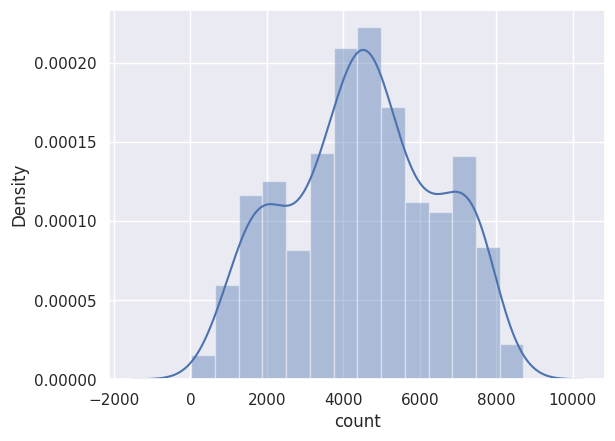

In [120]:
sn.distplot(daily_data['count'])

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot Peminjaman Berdasarkan Temperatur')]

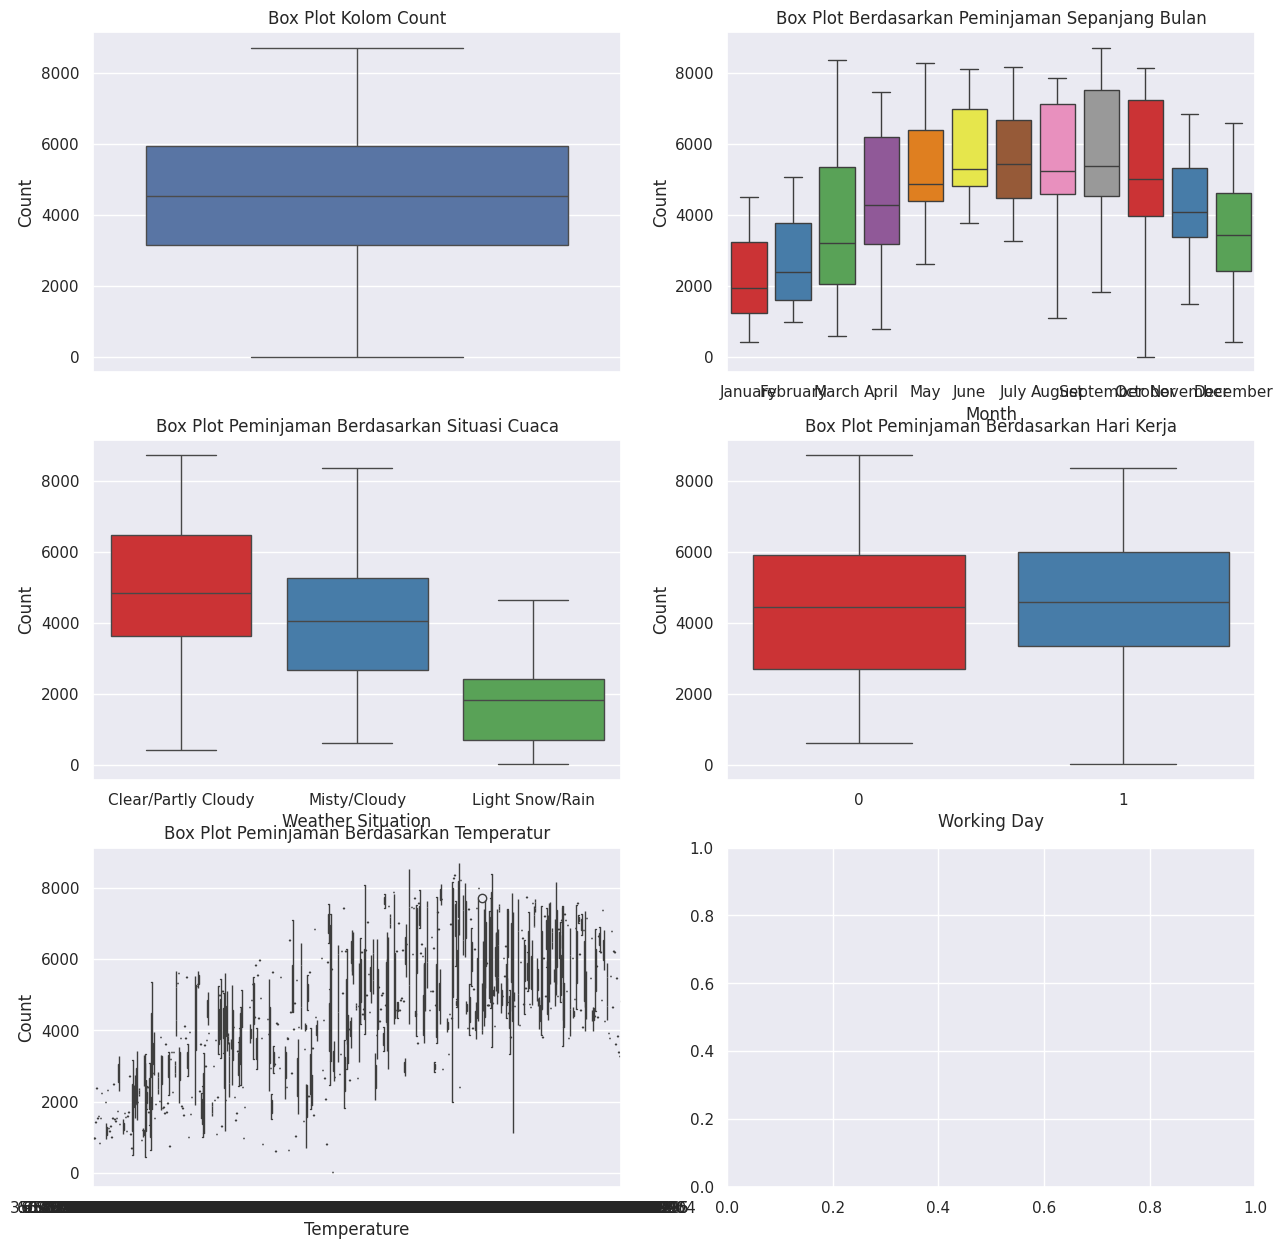

In [121]:
sn.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sn.boxplot(data=daily_data, y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=daily_data, y="count", x="month", orient="v", ax=axes[0][1], hue="month", palette='Set1', legend=False)
sn.boxplot(data=daily_data, y="count", x="weather", orient="v", ax=axes[1][0], hue="weather", palette='Set1', legend=False)
sn.boxplot(data=daily_data, y="count", x="workingday", orient="v", ax=axes[1][1], hue="workingday", palette='Set1', legend=False)
sn.boxplot(data=daily_data, y="count", x="temp", orient="v", ax=axes[2][0], hue="temp", palette='Set1', legend=False)

axes[0][0].set(ylabel='Count',title="Box Plot Kolom Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot Berdasarkan Peminjaman Sepanjang Bulan")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot Peminjaman Berdasarkan Situasi Cuaca")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot Peminjaman Berdasarkan Hari Kerja")
axes[2][0].set(xlabel='Temperature', ylabel='Count',title="Box Plot Peminjaman Berdasarkan Temperatur")

<ipython-input-122-53c3056f3d39>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(hourly_data['count'])


<Axes: xlabel='count', ylabel='Density'>

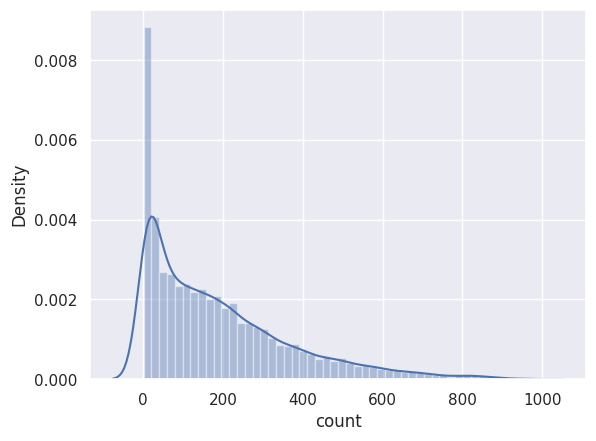

In [122]:
sn.distplot(hourly_data['count'])

[Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot Peminjaman Setiap Jam')]

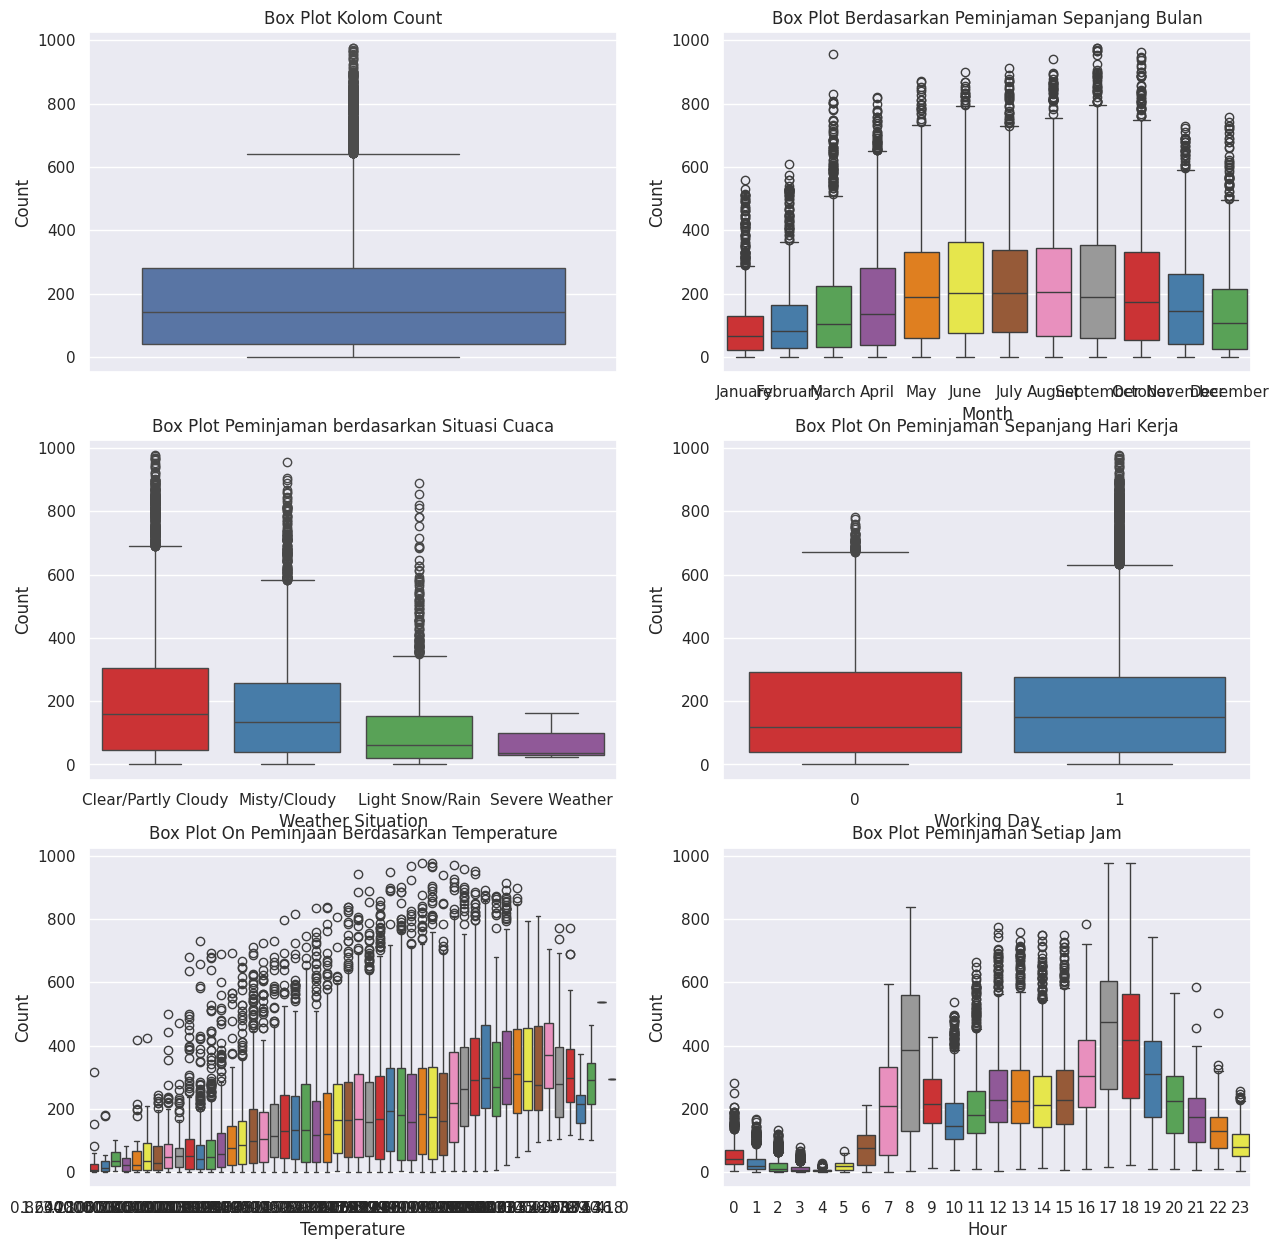

In [123]:
sn.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sn.boxplot(data=hourly_data, y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=hourly_data, y="count", x="month", orient="v", ax=axes[0][1], hue="month", palette='Set1', legend=False)
sn.boxplot(data=hourly_data, y="count", x="weather", orient="v", ax=axes[1][0], hue="weather", palette='Set1', legend=False)
sn.boxplot(data=hourly_data, y="count", x="workingday", orient="v", ax=axes[1][1], hue="workingday", palette='Set1', legend=False)
sn.boxplot(data=hourly_data, y="count", x="temp", orient="v", ax=axes[2][0], hue="temp", palette='Set1', legend=False)
sn.boxplot(data=hourly_data, y="count", x="hour", orient="v", ax=axes[2][1], hue="hour", palette='Set1', legend=False)

axes[0][0].set(ylabel='Count',title="Box Plot Kolom Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot Berdasarkan Peminjaman Sepanjang Bulan")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot Peminjaman berdasarkan Situasi Cuaca")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Peminjaman Sepanjang Hari Kerja")
axes[2][0].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Peminjaan Berdasarkan Temperature")
axes[2][1].set(xlabel='Hour', ylabel='Count',title="Box Plot Peminjaman Setiap Jam")

Dilihat dari visualisasi tersebut dapat dilihat bahwa outlier ada pada file hour.csv namun tidak terlihat adanya outlier pada file day.csv. Pada tahap EDA file day.csv akan digunakan untuk melihat trend peminjaman sepeda, pengaruh musim pada peminjaman sepeda, dan perbandingan peminjam sepeda registered dan casual, sedangakan untuk hour.csv akan digunakan untuk melihat tingkat peminjaman dalam sehari jam berapakah adanya lonjakan peminjam sepeda.

## Exploratory Data Analysis (EDA)

Pengecekan kembali isi dataframe `daily_data`. Jika diperhatikan sekilas seperti kolom `season`, `holiday` dan yang lainnya memiliki value dalam angka. Artinya beberapa atribut data telah mengalami proses *encoding*. Begitu juga terhadap atribut suhu seperti `temp`, `atemp`, `hum` dan lainnya besarnya sudah dinormalisasi sehingga memiliki rentang nilai di 0 dan 1. Hal tentu mempersulit proses ketika nantinya ingin mencari insight atau sejenisnya saat EDA. Sehingga perlu dilakukan proses *Decoding* maupun *denormalisasi* nantinya.

In [169]:
Readme = open('/content/Readme.txt', 'r')
print(Readme.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

Setelah dilakukan pengecekan pada informasi dataset autor dibawah (berdasarkan Dataset Characteristic , berikut lengkapnya atribut yang telah dilakukan `label` dan `ordinal` *encoding*.

|  Kolom Data  | Keterangan |
|--------------|------------|
| `season`     | Telah dilakukan proses *label encoding* (pengubahan dari data bertipe *string* menjadi numerik)|
| `yr`         | Telah dilakukan proses *ordinal encoding* (pengubahan data secara berurutan dari tahun menjadi numerik)|
| `holiday`    | Telah dilakukan proses *binary encoding* (pengubahan dari data bertipe *string* menjadi nilai *boolean*)|
| `weekday`    | Telah dilakukan proses *ordinal encoding* (pengubahan data secara berurutan dari hari menjadi numerik)|
| `workingday` | Telah dilakukan proses *label encoding* (pengubahan dari data bertipe *string* menjadi nilai *boolean*)|
| `weathersit` | Telah dilakukan proses *ordinal encoding* (pengubahan data secara berurutan dari tingkatan jenis cuaca bertipe *string* menjadi numerik)|
| `temp`       | Telah dilakukan normalisasi dengan melakukan pembagian nilainya menjadi 41 (max). |
| `atemp`      | Telah dilakukan normalisasi dengan melakukan pembagian nilainya menjadi 50 (max). |
| `hum`        | Telah mengalami normalisasi dengan melakukan pembagian nilainya menjadi 100 (max). |
| `windspeed`  | Telah mengalami normalisasi dengan melakukan pembagian nilainya menjadi 67 (max). |


### Explore ...

Heatmap correlation matrix

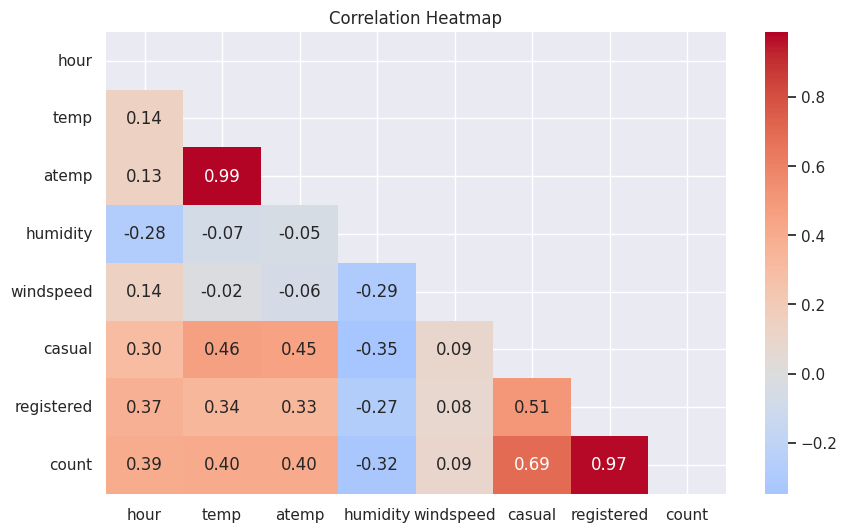

In [124]:
fig, ax = plt.subplots(figsize=(10, 6))

correlation_matrix = hourly_data.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sn.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)

plt.title("Correlation Heatmap")
plt.show()

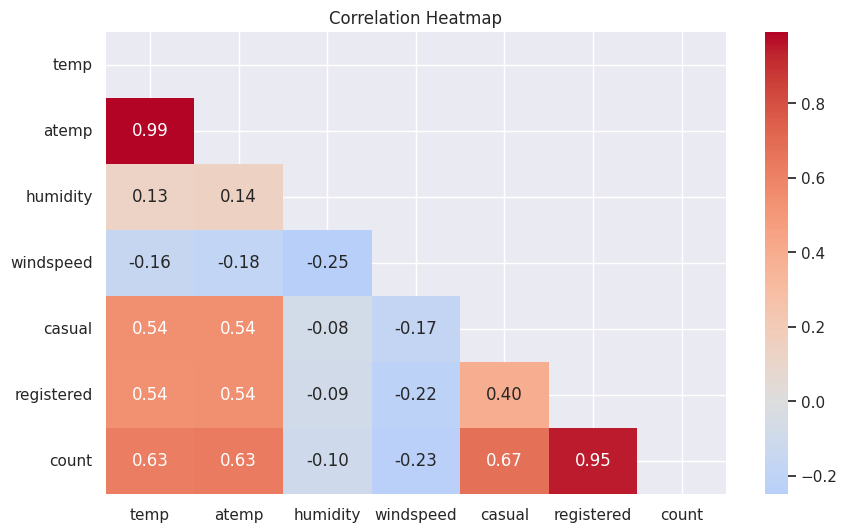

In [125]:
fig, ax = plt.subplots(figsize=(10, 6))

correlation_matrix = daily_data.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sn.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)

plt.title("Correlation Heatmap")
plt.show()

Dapat dilihat pada grafik atau diagram *heatmap* di atas memiliki *range* atau rentang dari angka 1.0 hingga -1.0 dimana semakin mendekati 1, maka korelasi antar fitur numerik semakin kuat bernilai positif, lalu semakin mendekati 0, maka korelasi antar fitur numerik semakin rendah, kemudian semakin mendekati -1, maka korelasi antar fitur numerik semakin kuat bernilai negatif.

Trend Peminjaman Sepeda:

In [126]:
daily_data.groupby(by='year').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
       max  min         mean      sum
year                                 
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

In [127]:
daily_data.groupby('year')[['registered', 'casual','count']].sum()

,registered,casual,count
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


In [128]:
daily_data.groupby(by=["year","month"]).agg({
    "count": "sum"
}).reset_index()

,year,month,count
0,2011,January,38189
1,2011,February,48215
2,2011,March,64045
3,2011,April,94870
4,2011,May,135821
5,2011,June,143512
6,2011,July,141341
7,2011,August,136691
8,2011,September,127418
9,2011,October,123511


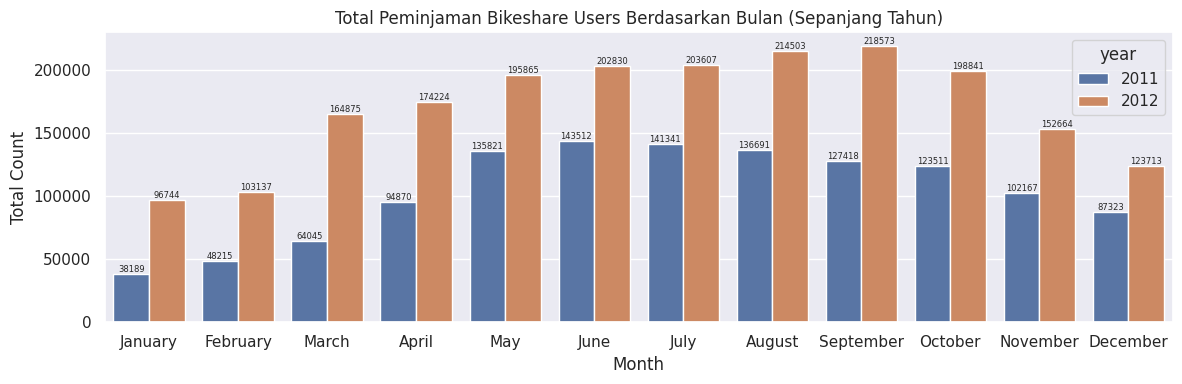

In [172]:
monthly_counts = daily_data.groupby(by=["year", "month"]).agg({"count": "sum"}).reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 4))
ax = sn.barplot(x="month", y="count", hue="year", data=monthly_counts)
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=6)

# Set labels and title
plt.xlabel("Month")
plt.ylabel("Total Count")
plt.title("Total Peminjaman Bikeshare Users Berdasarkan Bulan (Sepanjang Tahun)")

# Show the plot
plt.tight_layout()
plt.show()

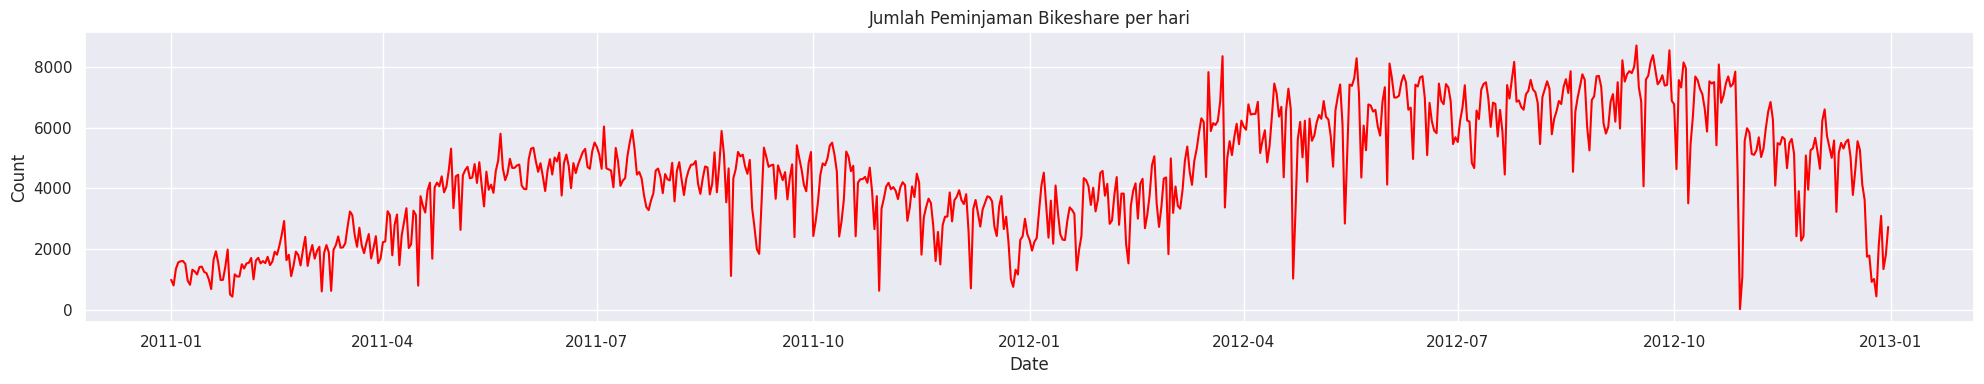

In [175]:
plt.figure(figsize=(20,4))

# Create a line plot using the sns.lineplot() function
sn.lineplot(x="date", y="count", data=daily_data, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Jumlah Peminjaman Bikeshare per hari")

# Show the plot
plt.tight_layout()
plt.show()

Peminjaman sepeda berdasarkan cuaca:

In [131]:
daily_data.groupby(by='weather').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather                                             
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Misty/Cloudy         8362  605  4035.862348   996858
Light Snow/Rain      4639   22  1803.285714    37869

Peminjaman sepeda perhari:

In [132]:
daily_data.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Sun      8227   605  4228.828571
Mon      7525    22  4338.123810
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462
Thu      7804   431  4667.259615
Fri      8362  1167  4690.288462
Sat      8714   627  4550.542857

Peminjaman sepeda perjam:

In [133]:
hourly_data.groupby(by='hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

Peminjaman sepeda di hari kerja dan liburan:

In [134]:
daily_data.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [135]:
daily_data.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Peminjaman sepeda tiap musim:

In [136]:
daily_data.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

Kondisi faktor lain tiap musim:

In [137]:
daily_data.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
})

temp                           atemp                       \
              max        min       mean       max       min       mean   
season                                                                   
Spring  23.472500   2.424346  12.207650  27.43085   3.95348  14.845697   
Summer  33.141653  10.374763  22.320611  37.87895  12.51695  26.015366   
Fall    35.328347  19.235847  28.958682  42.04480  12.12000  32.794920   
Winter  26.957500   9.054153  17.339148  30.39875  11.39565  20.776937   

       humidity                      
            max      min       mean  
season                               
Spring  94.8261   0.0000  58.290291  
Summer  92.2500  25.4167  62.694833  
Fall    93.9565  36.0000  63.348206  
Winter  97.2500  33.3478  66.871917

### Univariate Analysis

In [138]:
float_vars = ['temp', 'atemp', 'humidity', 'windspeed']
df_float = daily_data[float_vars]

df_float.describe()

,temp,atemp,humidity,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,20.310776,23.717699,62.789406,12.762576
std,7.505091,8.148059,14.242910,5.192357
min,2.424346,3.953480,0.000000,1.500244
25%,13.820424,16.892125,52.000000,9.041650
50%,20.431653,24.336650,62.666700,12.125325
75%,26.872076,30.430100,73.020850,15.625371
max,35.328347,42.044800,97.250000,34.000021


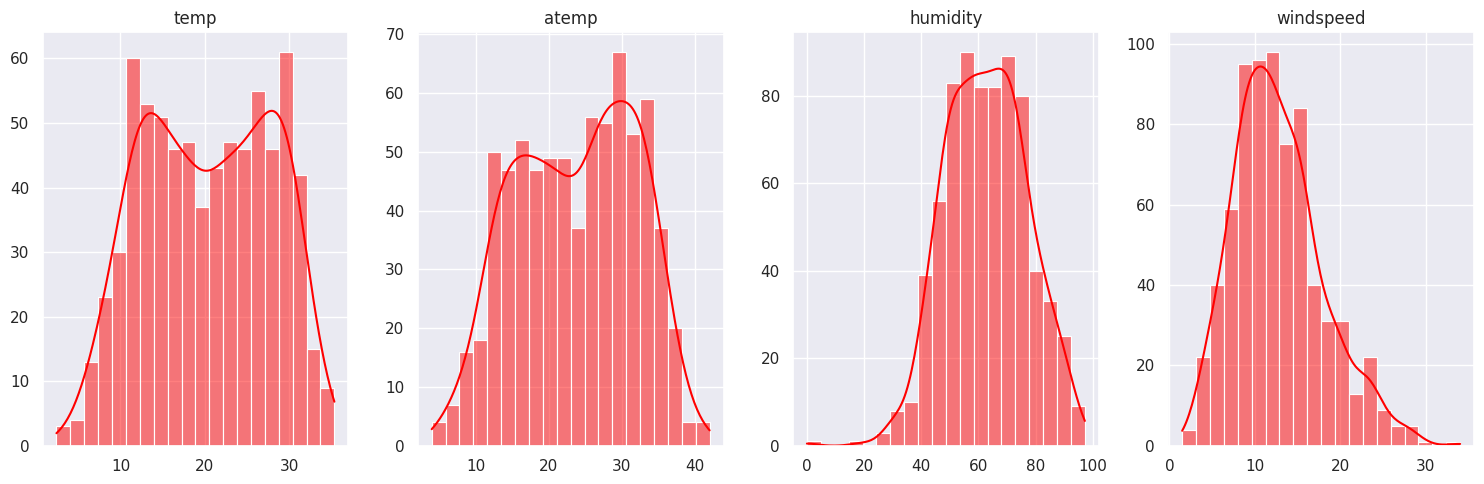

In [179]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))
for i, ax in enumerate(axs):
    sn.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=20, color='red')

    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

Berdasarkan plot atau grafik histogram diatas.
- atibut temp tampak symetrical
- atribut atemp tampak left skewed
- atribut humidity tampak left skewed
- atribut windspeed tampak right skewed

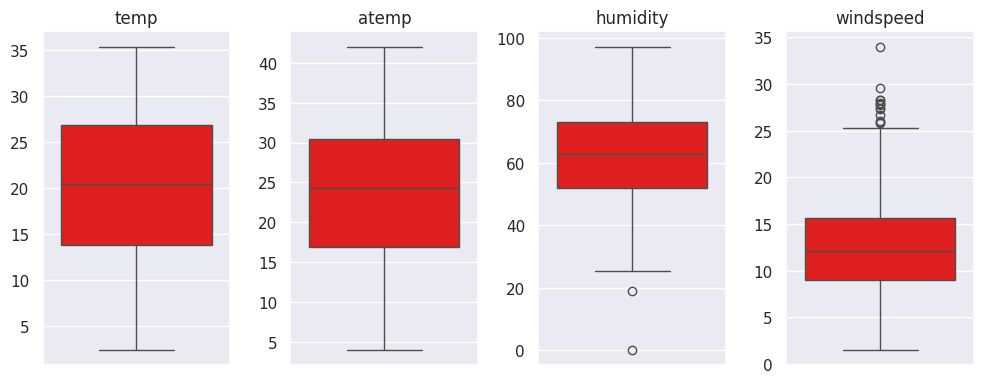

In [182]:
fig, axs = plt.subplots(1, 4, figsize=(10, 4))

for i, ax in enumerate(axs):
    sn.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='red')

    ax.set_title(float_vars[i])
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

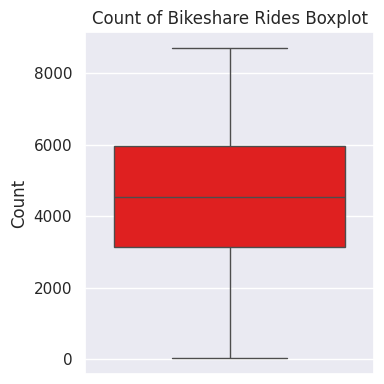

In [184]:
fig, axs = plt.subplots(figsize=(4, 4))

sn.boxplot(y=daily_data['count'], ax=axs, color='red')

plt.xlabel("")
plt.ylabel("Count")
plt.title("Count of Bikeshare Rides Boxplot")

plt.tight_layout()
plt.show()

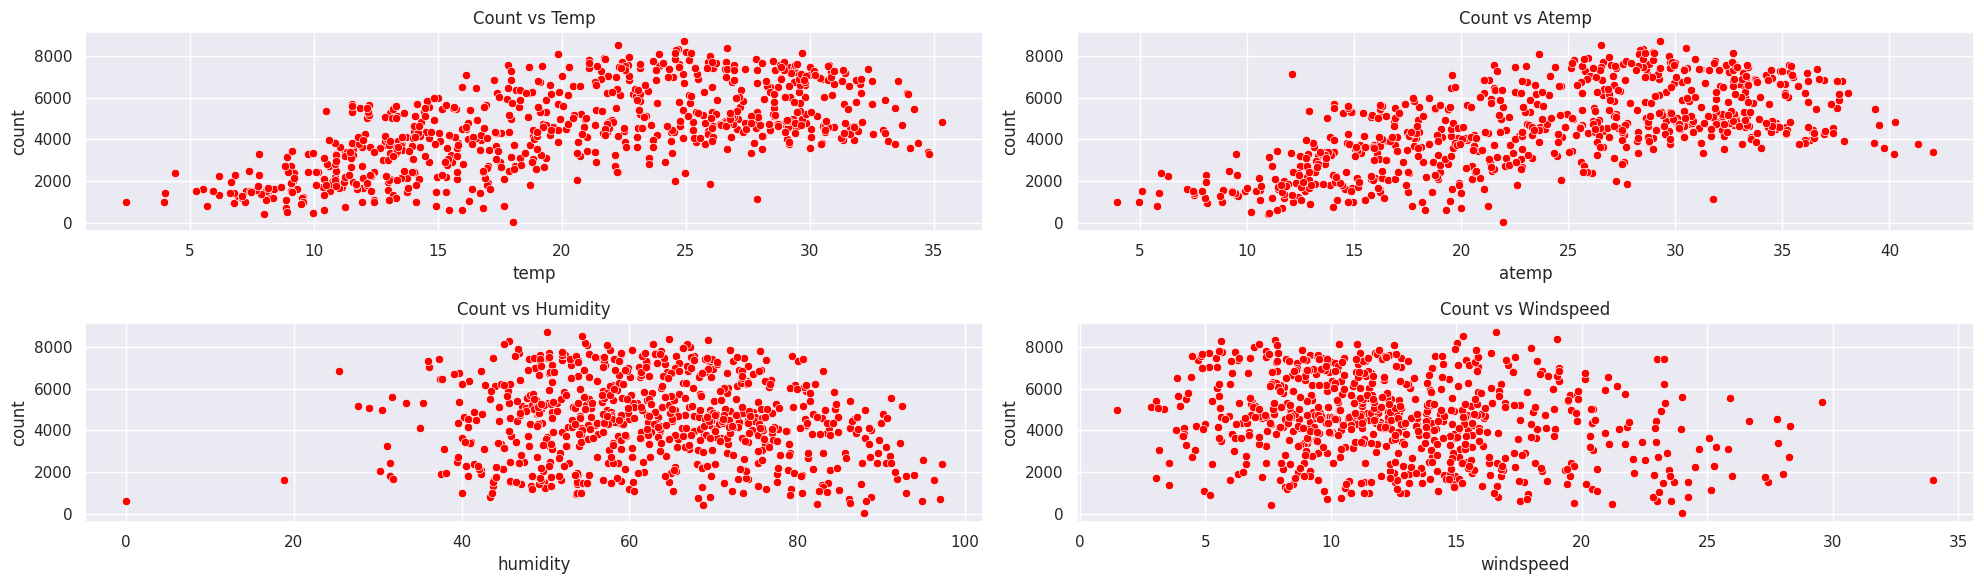

In [189]:
fig, axs = plt.subplots(2, 2, figsize=(20, 6))

columns_to_plot = ['temp', 'atemp', 'humidity', 'windspeed']

for i, col in enumerate(columns_to_plot):
    sn.scatterplot(x=col, y='count', data=daily_data, ax=axs[i // 2, i % 2], color='red')
    axs[i // 2, i % 2].set_title(f'Count vs {col.capitalize()}')

plt.tight_layout()

plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend peminjaman sepeda dalam 2 tahun kebelakang?


In [143]:
monthly_users_df = daily_data.resample(rule='M', on='date').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

monthly_users_df.head(3)

,casual,registered,count
date,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045


In [144]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')

In [145]:
monthly_users_df.head(3)

,casual,registered,count
date,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045


In [146]:
monthly_users_df = monthly_users_df.reset_index()

In [147]:
monthly_users_df = monthly_users_df.rename(columns={'date': 'yearmonth'})

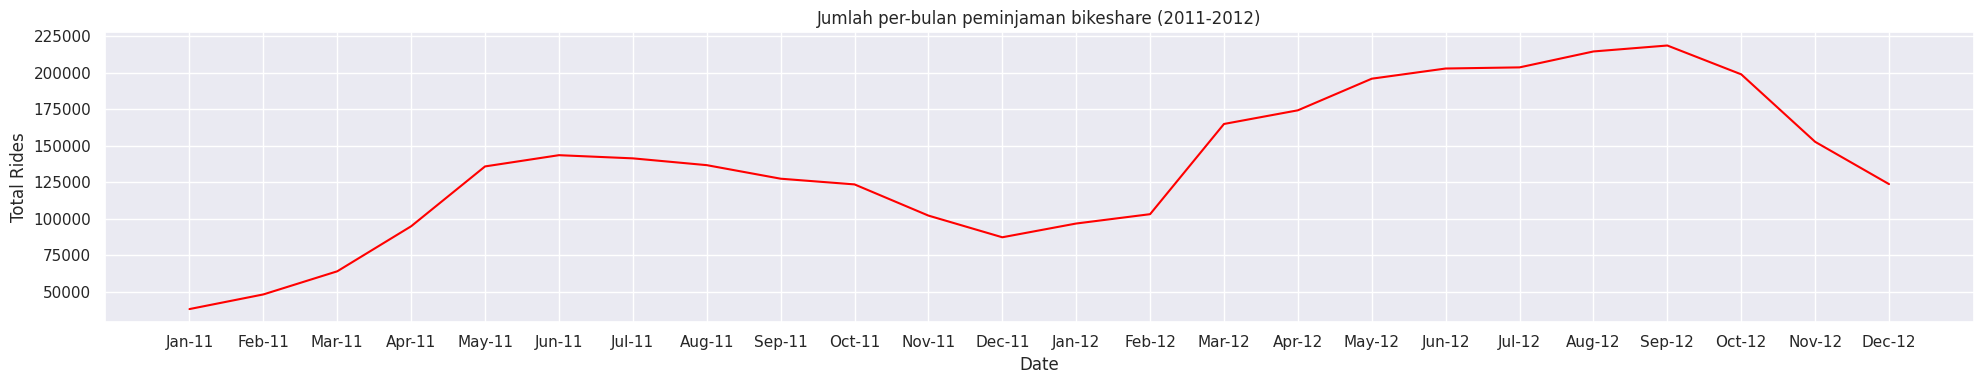

In [190]:
plt.figure(figsize=(20,4))

# Create a line plot using the sns.lineplot() function
sn.lineplot(x="yearmonth", y="count", data=monthly_users_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Jumlah per-bulan peminjaman bikeshare (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

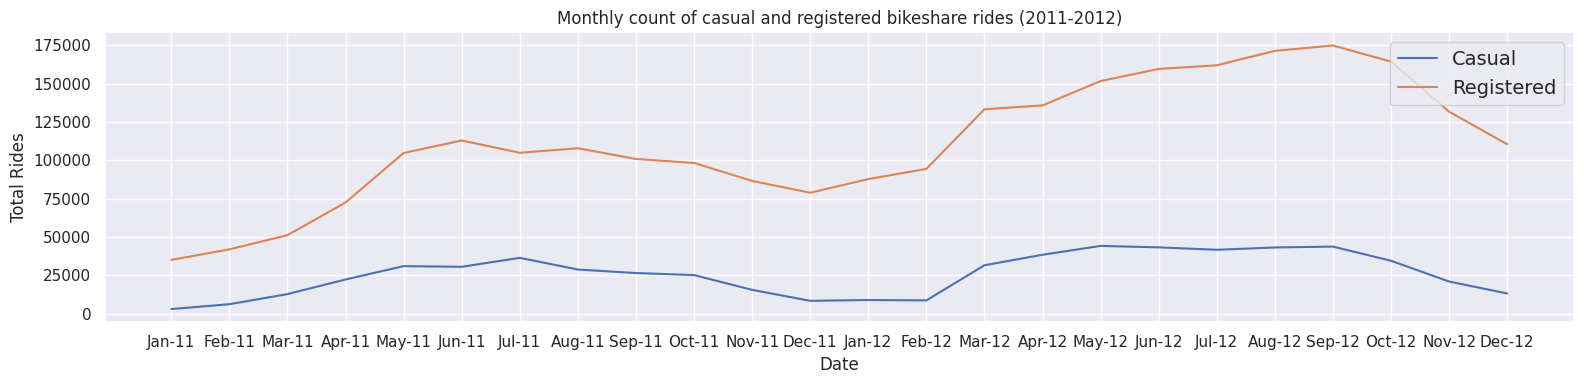

In [191]:
plt.figure(figsize=(16,4))
sn.lineplot(x="yearmonth", y="casual", data=monthly_users_df, label='Casual')
sn.lineplot(x="yearmonth", y="registered", data=monthly_users_df, label='Registered')

plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

plt.legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

**Insight**
1. Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011.
2. Kita bisa melihat adanya pola dalam 2 tahun tersebut. Jumlah perjalanan bikeshare biasanya mulai rendah di awal tahun, lalu mulai meningkat di kuartil 2, lalu mulai menurun di kuartil 4.
3. Jumlah aktivitas bikeshare registered user lebih tinggi dibandingkan aktivitas casual usr, meskipun keduanya menunjukkan tren yang sama sepanjang tahun.

### Pertanyaan 2: Apakah ada jam tertentu dimana peminjaman sepeda naik?


In [150]:
hourly_users_df = hourly_data.groupby("hour").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

hourly_users_df.head()

,casual,registered,count
hour,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


In [151]:
hourly_users_df = hourly_users_df.reset_index()

In [152]:
hourly_users_df.head()

,hour,casual,registered,count
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


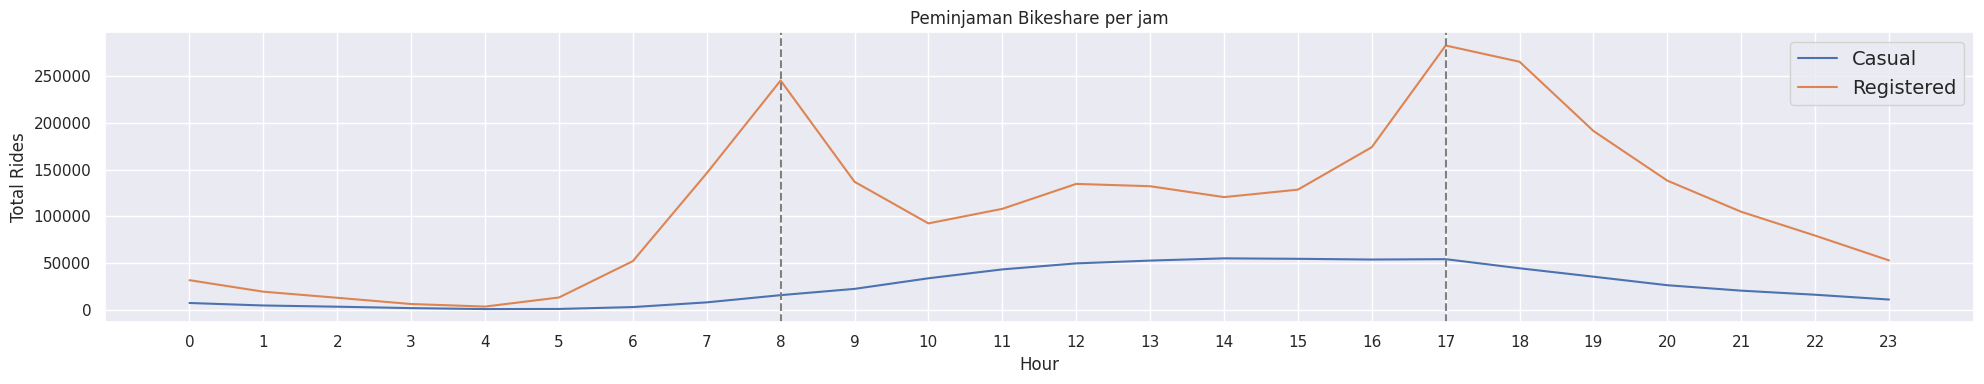

In [192]:
plt.figure(figsize=(20,4))

sn.lineplot(x="hour", y="casual", data=hourly_users_df, label='Casual')
sn.lineplot(x="hour", y="registered", data=hourly_users_df, label='Registered')

x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Peminjaman Bikeshare per jam")

plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

plt.legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

**Insight**
- Grafik di atas menunjukkan perbedaan yang sangat jelas dalam pola perjalanan sepeda bagi pengguna casual dan pengguna terdaftar berdasarkan jam dalam sehari.

- Pengguna terdaftar menunjukkan puncak aktivitas pada pukul 8.00 dan 17.00. Karena kedua waktu tersebut sesuai dengan jam berangkat dan pulang kerja, mungkin pengguna terdaftar menggunakan sepeda untuk perjalanan ke dan dari tempat kerja.

- Sebaliknya, pengguna casual menunjukkan tingkat aktivitas yang lebih tinggi di siang hari, kemudian mengalami penurunan setelah pukul 17.00.

### Pertanyaan 3: Apa musim yang memiliki peminjam sepeda terbanyak?

In [154]:
seasonly_users_df = daily_data.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

seasonly_users_df.head().sort_values('count')

,casual,registered,count
season,,,
Spring,60622,410726,471348
Winter,129782,711831,841613
Summer,203522,715067,918589
Fall,226091,835038,1061129


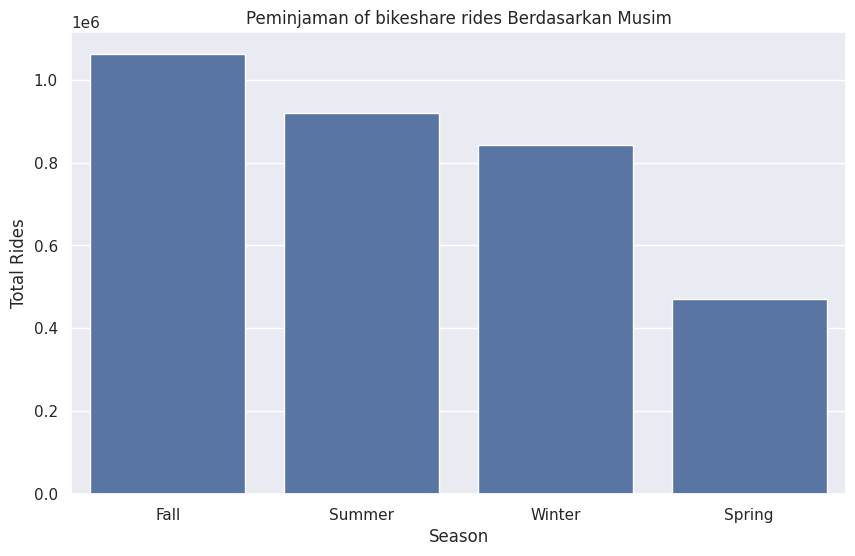

In [167]:
season_order = ['Fall', 'Summer', 'Winter', 'Spring']
plt.figure(figsize=(10,6))

ax = sn.barplot(x="season", y="count", data=seasonly_users_df, order=season_order)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Peminjaman of bikeshare rides Berdasarkan Musim")

plt.show()

In [156]:
seasonly_users_df_grouped = seasonly_users_df.groupby('season')[['casual', 'registered']].sum().reset_index()

seasonly_users_df_unpivoted = seasonly_users_df_grouped.melt(
    id_vars='season',
    var_name='status',
    value_name='user_count'
)



In [157]:
seasonly_users_df_unpivoted

,season,status,user_count
0,Spring,casual,60622
1,Summer,casual,203522
2,Fall,casual,226091
3,Winter,casual,129782
4,Spring,registered,410726
5,Summer,registered,715067
6,Fall,registered,835038
7,Winter,registered,711831


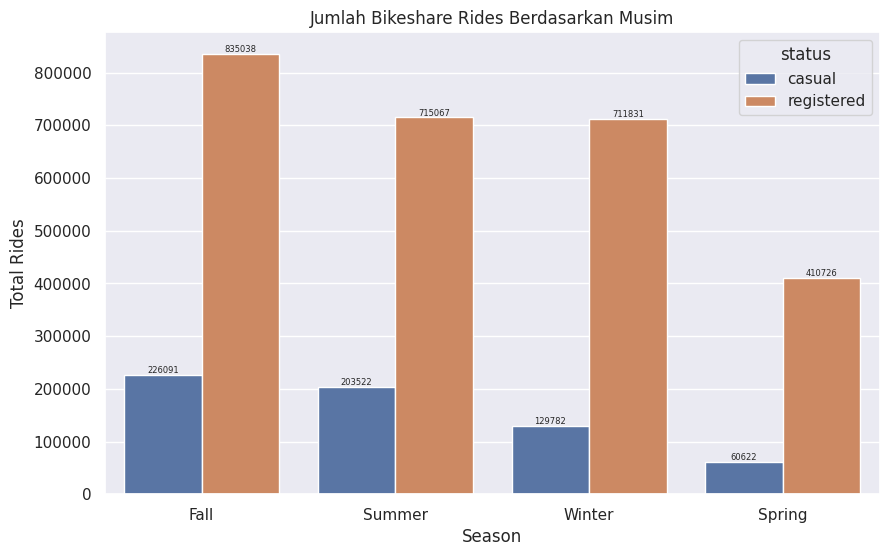

In [164]:
plt.figure(figsize=(10,6))

ax = sn.barplot(x='season', y='user_count', data=seasonly_users_df_unpivoted, order=season_order, hue='status')
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=6)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Jumlah Bikeshare Rides Berdasarkan Musim")

plt.show()

**Insight**
- Orang-orang lebih memilih menggunakan layanan Bike Sharing dimusim Fall, and jumlah peminjaman terkecil ada during Spring season.
- Tidak ada perbedaan yang signifikan antara casual and registered setiap musimnya, keduanya mencapai puncak tertinggi selama musim Fall dan paling rendah dimusim Spring.

### Pertanyaan 4: Apakah ada korelasi antara suhu dan kelembaban dengan jumlah peminjaman sepeda?

Temperatur

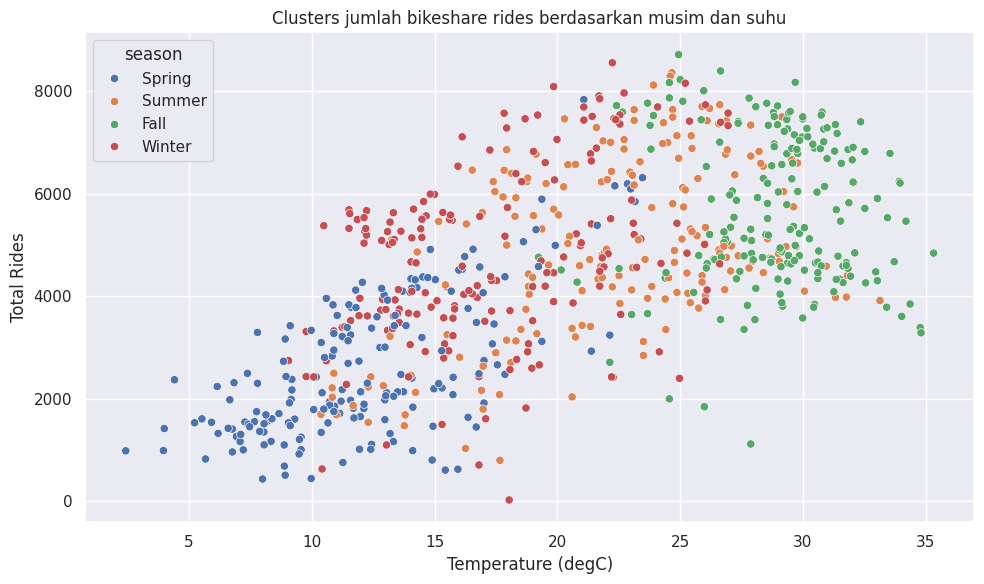

In [198]:
plt.figure(figsize=(10,6))

sn.scatterplot(x='temp', y='count', data=daily_data, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters jumlah bikeshare rides berdasarkan musim dan suhu")

plt.tight_layout()
plt.show()

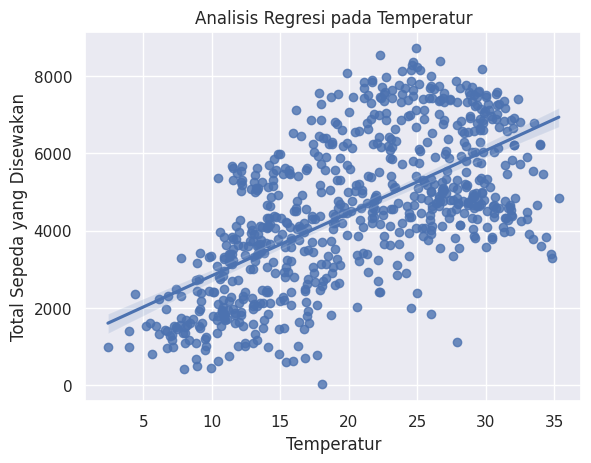

In [199]:
sns.regplot(x=daily_data['temp'], y=daily_data['count'])
plt.title('Analisis Regresi pada Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Total Sepeda yang Disewakan')
plt.show()

Season dan humidity

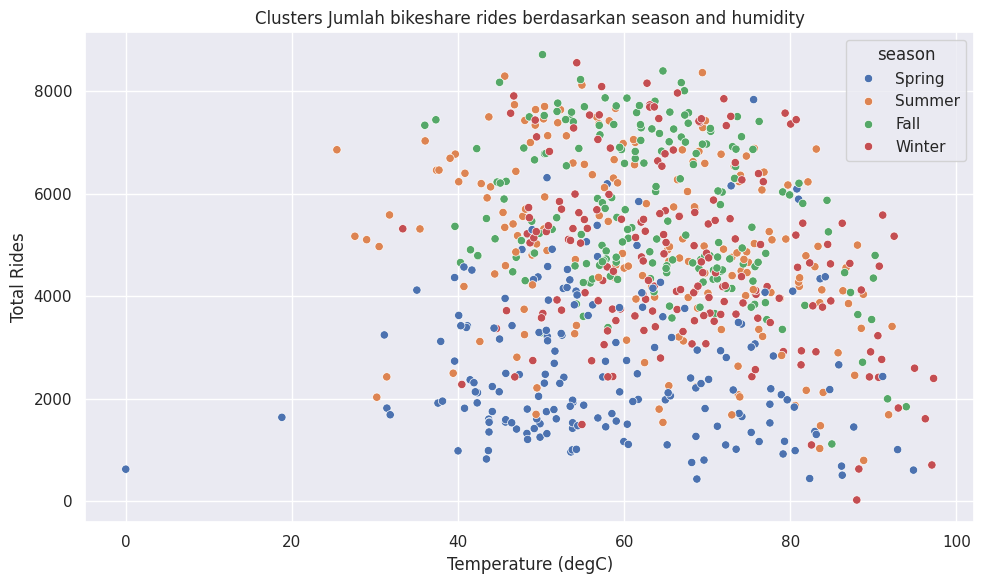

In [160]:
plt.figure(figsize=(10,6))

sn.scatterplot(x='humidity', y='count', data=daily_data, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters Jumlah bikeshare rides berdasarkan season and humidity")

plt.tight_layout()
plt.show()

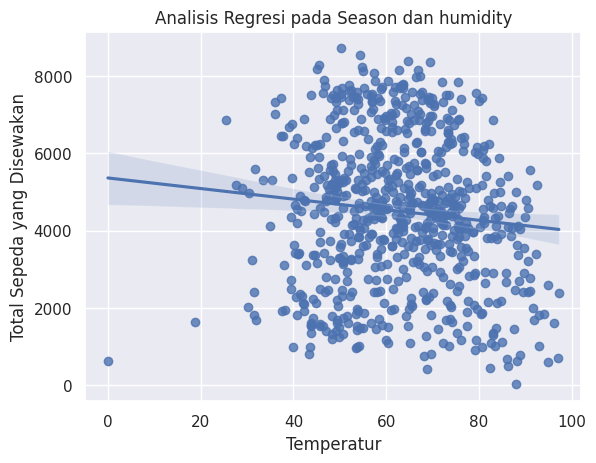

In [200]:
sns.regplot(x=daily_data['humidity'], y=daily_data['count'])
plt.title('Analisis Regresi pada Season dan humidity')
plt.xlabel('Temperatur')
plt.ylabel('Total Sepeda yang Disewakan')
plt.show()

### Pertanyaan 5: Apakah cuaca mempengaruhi peminjaman sepeda?

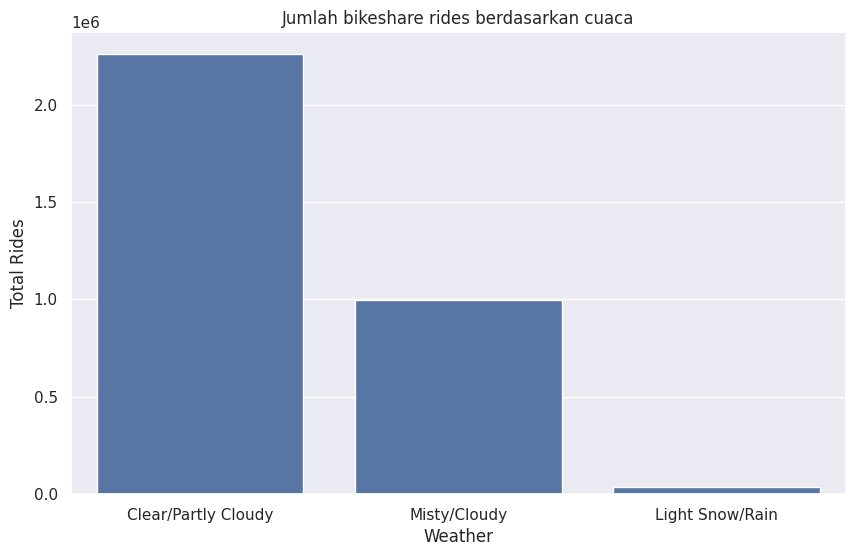

In [161]:
weatherly_users_df = daily_data.groupby("weather").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})
plt.figure(figsize=(10,6))

sn.barplot(x="weather", y="count", data=weatherly_users_df)

plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Jumlah bikeshare rides berdasarkan cuaca")

plt.show()

## Conclusion

pertanyaan 1

- Jumlah pengguna layanan Bike Sharing pada tahun 2012 tiap bulan, hari dan jam konsisten lebih tinggi dibandingkan tahun 2011. Kedua tahun tersebut menunjukkan tren dan musim yang sama, dengan jumlah perjalanan meningkat pada pertengahan tahun berada dipuncak pada bulan Agustus dan September dan menurun pada awal dan akhir tahun.

pertanyaan 2

- Pada registered users, jumlah perjalanan mencapai puncaknya pada pukul 08.00 pagi dan 17.00 sore, yang menunjukkan bahwa pengguna layanan ada pekerja atau pelajar yang menetap.
- Sedangkan casual users, jumlah perjalanan mulai meningkat pada siang hari dan menurun pada malam hari.

pertanyaan 3

- Jumlah perjalanan bikeshare tertinggi terjadi pada musim panas dan terendah pada musim dingin.

pertanyaan 4

- Terdapat korelasi antara suhu dan jumlah perjalanan bikeshare dimana seiring peningkatan suhu peminjam sepeda meningkat.
- Orang-orang menghindari penggunaan layanan pinjam sepeda pada suhu yang lebih dingin, yang terjadi selama musim dingin, dan mulai meningkat seiring dengan peningkatan suhu, yang terjadi pada musim panas. Namun, ada "sweet spot" atau kisaran suhu saat jumlah peminjam paling banyak, yaitu antara 20°C dan 30°C. Kisaran suhu ini biasanya terjadi pada musim panas dan musim gugur.
- Sedangkan untuk kelembaban/humidity terlihat bahwa peminjam paling banyak di antara 40-80 dan seiring peningkatan kelembaban peminjam sepeda semakin berkurang

pertanyaan 5

- Ya, jumlah peminjaman jauh lebih tinggi saat cuaca cerah dibandingkan saat kondisi cuaca lebih ekstrem.